In [15]:
import matplotlib.pyplot as plt
import rsatoolbox as rsa
import os
import globals as gl
import numpy as np

plt.style.use('default')

Text(0.5, 0.98, 'participant:101, hemisphere:L')

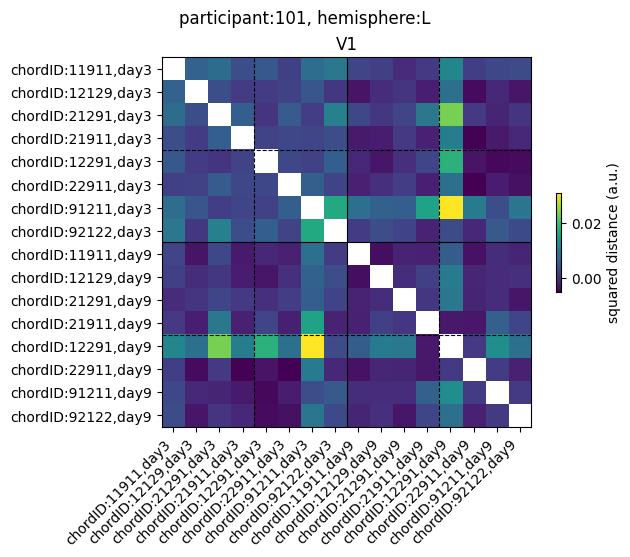

In [25]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
sn=101
glm = 1

roi = 'V1'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, experiment, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
rdms.reorder([0, 2, 6, 8, 4, 10, 12, 14, 1, 3, 7, 9, 5, 11, 13, 15])

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')